In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import get_all_data

player_data, rank_match_data, rank_player_match_data, swift_match_data, swift_player_match_data = get_all_data()

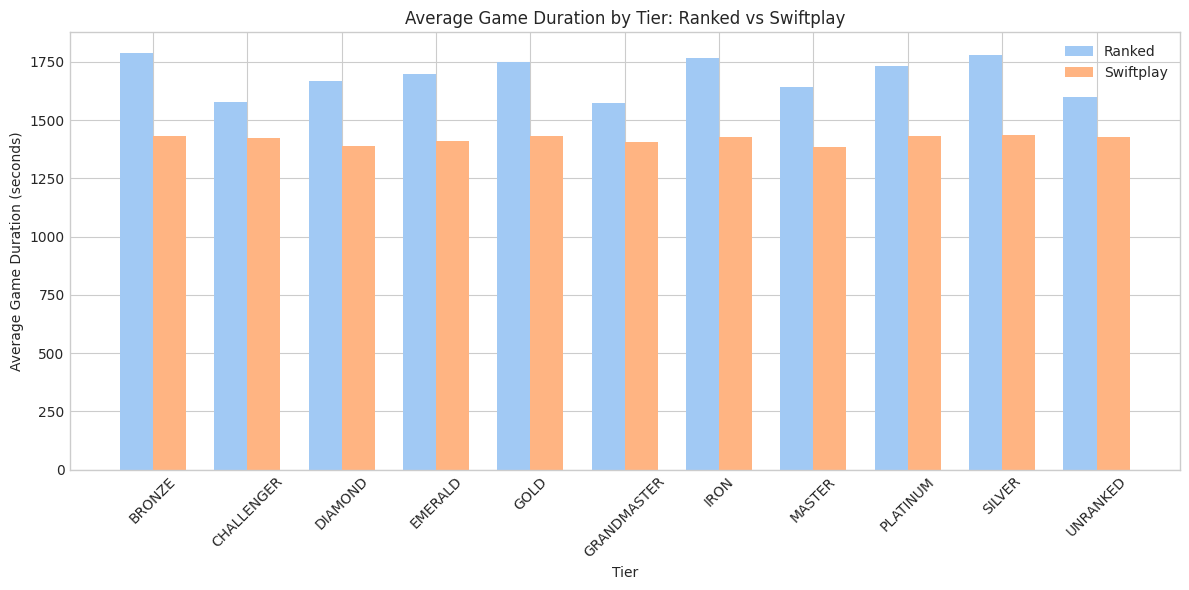

In [52]:
# Swiftplay duration vs Ranked duration

# Merge Ranked datasets
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")
ranked_duration = ranked_merged.groupby("tier")["gameDuration"].mean().reset_index()
ranked_duration = ranked_duration.sort_values("tier")

# Merge Swiftplay datasets
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")
swift_duration = swift_merged.groupby("tier")["gameDuration"].mean().reset_index()
swift_duration = swift_duration.sort_values("tier")

# Merge both on tier
combined = pd.merge(ranked_duration, swift_duration, on="tier", suffixes=("_Ranked", "_Swift"))

# Plotting side-by-side bar chart
x = np.arange(len(combined["tier"]))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, combined["gameDuration_Ranked"], width, label="Ranked")
plt.bar(x + width/2, combined["gameDuration_Swift"], width, label="Swiftplay")

plt.xlabel("Tier")
plt.ylabel("Average Game Duration (seconds)")
plt.title("Average Game Duration by Tier: Ranked vs Swiftplay")
plt.xticks(x, combined["tier"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Ranked - Early Surrender: 2.26%
Ranked - Regular Surrender: 26.23%
Swiftplay - Early Surrender: 3.70%
Swiftplay - Regular Surrender: 39.67%


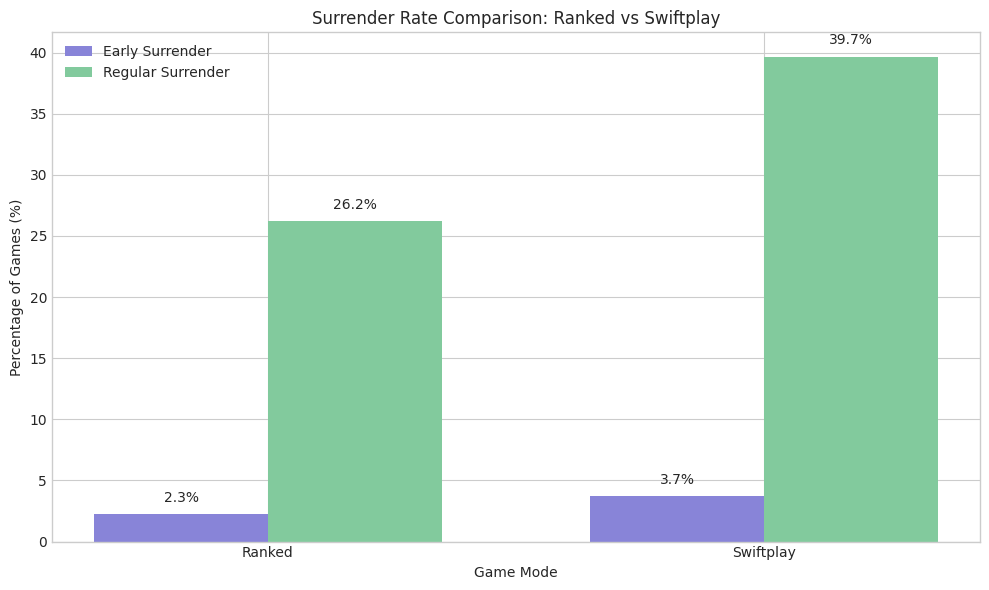

In [53]:
def get_surrender_percentage(groupby_obj):
    # count the occurrences of each boolean value
    counts = groupby_obj.size()
    
    # if true isn't in the index, that means there are no surrenders
    if True not in counts.index:
        return 0
    
    # calculate percentage of true values
    total = counts.sum()
    true_count = counts.get(True, 0)
    percentage = (true_count / total) * 100
    
    return percentage

# In all games, the percentage of gameEnded InEarlySurrender, and gameEndedInSurrender
# compare rate of games ended in early surrender and games ended in surrender in ranked with 
# games ended in early surrender and games ended in surrender in swiftplay

swiftplay_early_surrender = swift_match_data.groupby("gameEndedInEarlySurrender")
swiftplay_surrender = swift_match_data.groupby("gameEndedInSurrender")
ranked_early_surrender = rank_match_data.groupby("gameEndedInEarlySurrender")
ranked_surrender = rank_match_data.groupby("gameEndedInSurrender")

swiftplay_early_pct = get_surrender_percentage(swiftplay_early_surrender)
swiftplay_regular_pct = get_surrender_percentage(swiftplay_surrender)
ranked_early_pct = get_surrender_percentage(ranked_early_surrender)
ranked_regular_pct = get_surrender_percentage(ranked_surrender)

# print the calculated percentages
print(f"Ranked - Early Surrender: {ranked_early_pct:.2f}%")
print(f"Ranked - Regular Surrender: {ranked_regular_pct:.2f}%")
print(f"Swiftplay - Early Surrender: {swiftplay_early_pct:.2f}%")
print(f"Swiftplay - Regular Surrender: {swiftplay_regular_pct:.2f}%")

# create a df for plotting
data = {
    'Game Mode': ['Ranked', 'Ranked', 'Swiftplay', 'Swiftplay'],
    'Surrender Type': ['Early Surrender', 'Regular Surrender', 'Early Surrender', 'Regular Surrender'],
    'Percentage': [ranked_early_pct, ranked_regular_pct, swiftplay_early_pct, swiftplay_regular_pct]
}
plot_df = pd.DataFrame(data)

# create grouped bar chart
plt.figure(figsize=(10, 6))

# prepare data for grouped bar chart
x = np.array([0, 1])  # positions for ranked and swiftplay
width = 0.35

# create bars
plt.bar(x - width/2, [ranked_early_pct, swiftplay_early_pct], width, 
        label='Early Surrender', color='#8884d8')
plt.bar(x + width/2, [ranked_regular_pct, swiftplay_regular_pct], width,
        label='Regular Surrender', color='#82ca9d')

# add labels and title
plt.xlabel('Game Mode')
plt.ylabel('Percentage of Games (%)')
plt.title('Surrender Rate Comparison: Ranked vs Swiftplay')
plt.xticks(x, ['Ranked', 'Swiftplay'])
plt.legend()

# add percentage values on top of bars
plt.text(x[0] - width/2, ranked_early_pct + 1, f'{ranked_early_pct:.1f}%', ha='center')
plt.text(x[0] + width/2, ranked_regular_pct + 1, f'{ranked_regular_pct:.1f}%', ha='center')
plt.text(x[1] - width/2, swiftplay_early_pct + 1, f'{swiftplay_early_pct:.1f}%', ha='center')
plt.text(x[1] + width/2, swiftplay_regular_pct + 1, f'{swiftplay_regular_pct:.1f}%', ha='center')

plt.tight_layout()
# plt.savefig('surrender_comparison.png')
plt.show()



In [54]:
# Out of those who surrender, how are they divided by rank for both swiftplay and ranked?
# left join rankedplayermatchdata with rankedmatches by matchid, filter out games without surrender, merge with players by puuid, access how many of
# each tier exist in pie chart

# Merge Ranked datasets
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")

# filter only surrendered games (either early or regular surrender)
ranked_surrendered = ranked_merged[(ranked_merged["gameEndedInEarlySurrender"] == True) | 
                                  (ranked_merged["gameEndedInSurrender"] == True)]
# ranked_surrender_with_tier = pd.merge(ranked_surrendered, player_data, on="puuid")

# For Swiftplay games
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")

# Filter only surrendered games
swift_surrendered = swift_merged[(swift_merged["gameEndedInEarlySurrender"] == True) | 
                                (swift_merged["gameEndedInSurrender"] == True)]

# Merge with player data
# swift_surrender_with_tier = pd.merge(swift_surrendered, player_data, on="puuid")


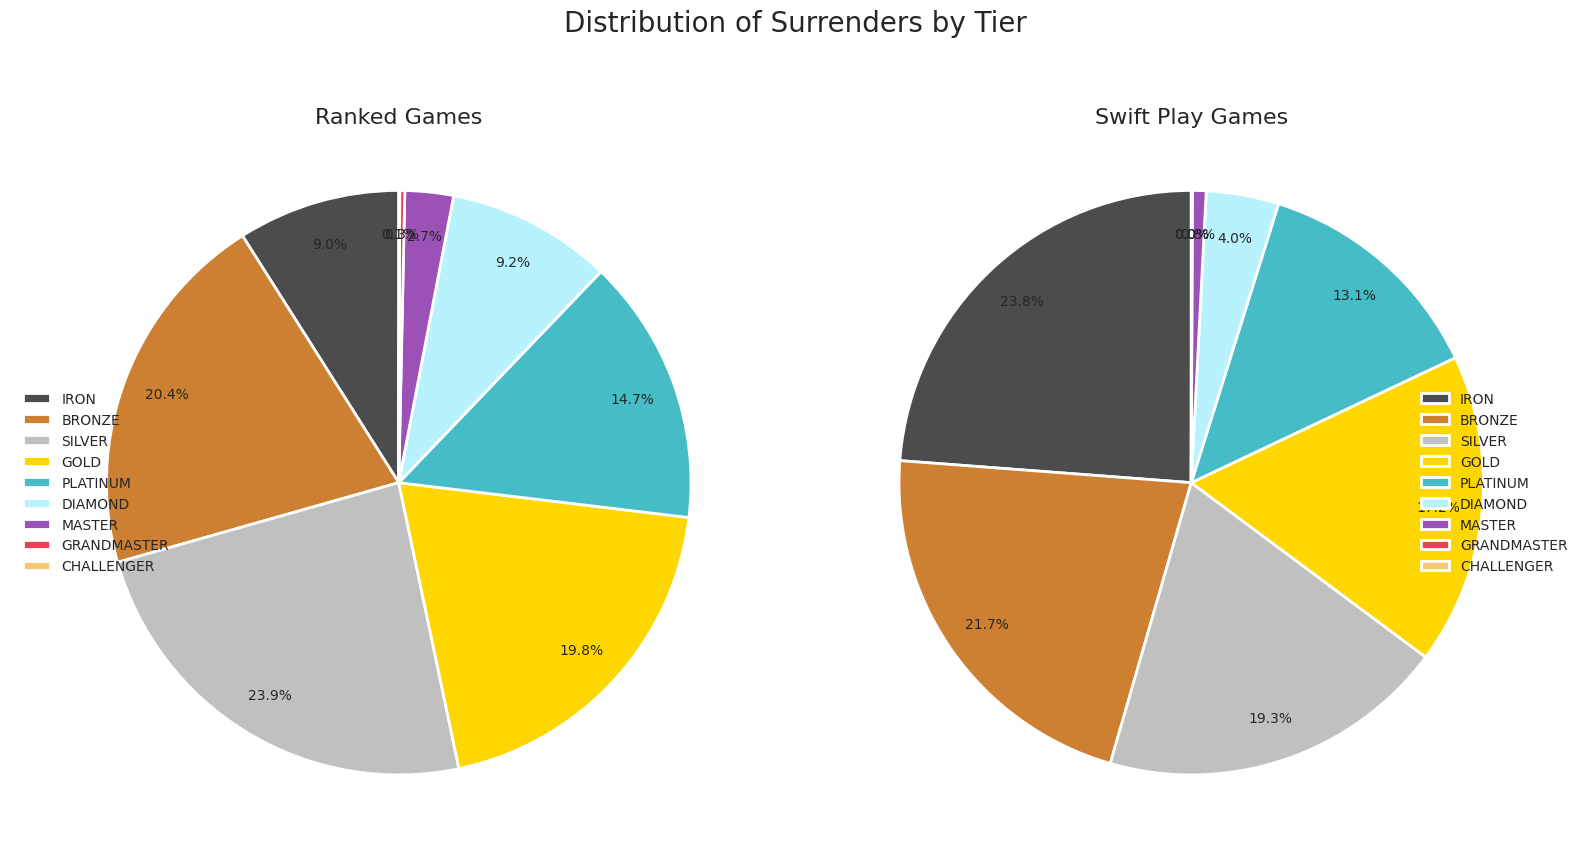

In [55]:
import seaborn as sns

# Set a clean, modern style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Count the number of surrenders by tier
ranked_tier_counts = ranked_surrendered['tier'].value_counts()
swift_tier_counts = swift_surrendered['tier'].value_counts()

# Sort the data by rank hierarchy for better visualization
tier_order = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRANDMASTER', 'CHALLENGER']
ranked_tier_counts = ranked_tier_counts.reindex(tier_order).dropna()
swift_tier_counts = swift_tier_counts.reindex(tier_order).dropna()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Distribution of Surrenders by Tier', fontsize=20, y=1.05)

# Color map that follows League rank colors
colors = {
    'IRON': '#4c4c4c',      # Dark gray
    'BRONZE': '#cd7f32',    # Bronze
    'SILVER': '#c0c0c0',    # Silver
    'GOLD': '#ffd700',      # Gold
    'PLATINUM': '#46bdc6',  # Teal
    'DIAMOND': '#b9f2ff',   # Light blue
    'MASTER': '#9c51b6',    # Purple
    'GRANDMASTER': '#e84057', # Red
    'CHALLENGER': '#f4c874'  # Light gold
}

# Extract colors in the correct order
ranked_colors = [colors[tier] for tier in ranked_tier_counts.index]
swift_colors = [colors[tier] for tier in swift_tier_counts.index]

# Plot the pie chart for Ranked surrenders
ax1.pie(
    ranked_tier_counts, 
    labels=None,  # No labels on the pie itself
    colors=ranked_colors,
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Add a clean legend for ranked
ax1.legend(
    ranked_tier_counts.index,
    loc="center left",
    bbox_to_anchor=(0, 0.5),
    frameon=False
)
ax1.set_title('Ranked Games', fontsize=16)

# Plot the pie chart for Swift Play surrenders
ax2.pie(
    swift_tier_counts, 
    labels=None,  # No labels on the pie itself
    colors=swift_colors,
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Add a clean legend for swift play
ax2.legend(
    swift_tier_counts.index,
    loc="center right", 
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
ax2.set_title('Swift Play Games', fontsize=16)

# Remove the axes
ax1.axis('equal')
ax2.axis('equal')

plt.tight_layout()
plt.show()

In [56]:
# Average amount of time spent dead; Average amount of time spent dead by rank(??)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import get_all_data
player_data, rank_match_data, rank_player_match_data, swift_match_data, swift_player_match_data = get_all_data()
print(rank_player_match_data.columns)
print(player_data.columns)
print(rank_match_data.columns)
print(swift_match_data.columns)
print(swift_player_match_data.columns)

Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints', 'full_rank'],
      dtype='object')
Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio',
       'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='obj

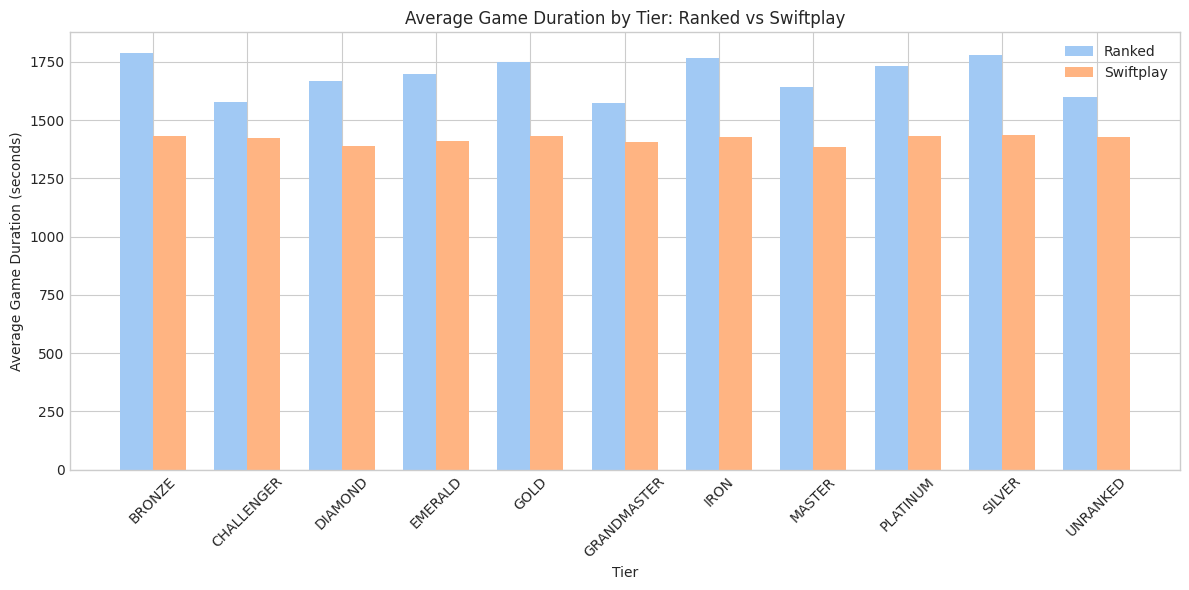

In [57]:
# Swiftplay duration vs Ranked duration
# Merge Ranked datasets
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")
ranked_duration = ranked_merged.groupby("tier")["gameDuration"].mean().reset_index()
ranked_duration = ranked_duration.sort_values("tier")
# Merge Swiftplay datasets
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")
swift_duration = swift_merged.groupby("tier")["gameDuration"].mean().reset_index()
swift_duration = swift_duration.sort_values("tier")
# Merge both on tier
combined = pd.merge(ranked_duration, swift_duration, on="tier", suffixes=("_Ranked", "_Swift"))
# Plotting side-by-side bar chart
x = np.arange(len(combined["tier"]))  # label locations
width = 0.35  # width of the bars
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, combined["gameDuration_Ranked"], width, label="Ranked")
plt.bar(x + width/2, combined["gameDuration_Swift"], width, label="Swiftplay")
plt.xlabel("Tier")
plt.ylabel("Average Game Duration (seconds)")
plt.title("Average Game Duration by Tier: Ranked vs Swiftplay")
plt.xticks(x, combined["tier"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Ranked - Early Surrender: 2.26%
Ranked - Regular Surrender: 26.23%
Swiftplay - Early Surrender: 3.70%
Swiftplay - Regular Surrender: 39.67%


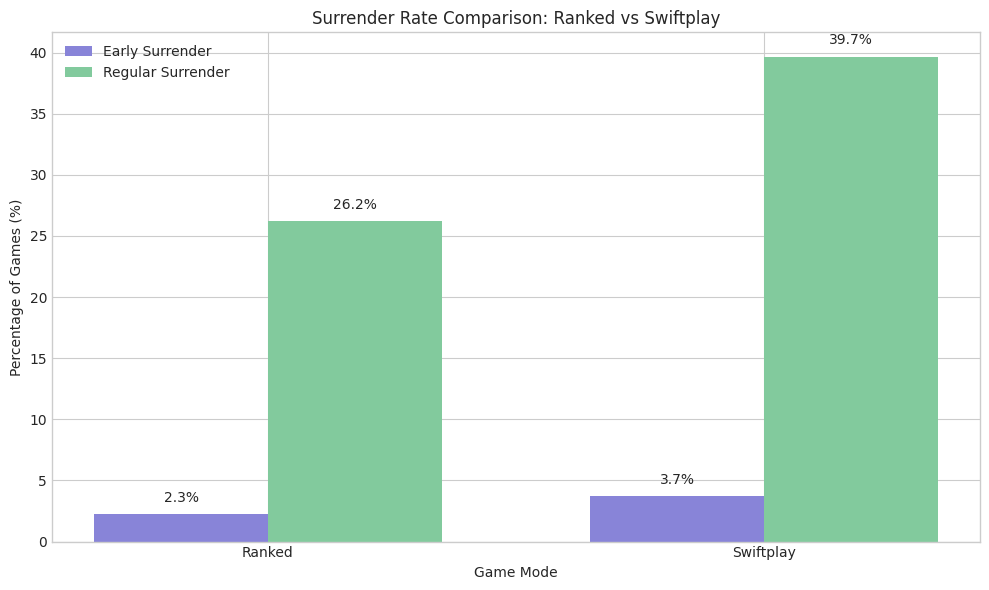

In [58]:
def get_surrender_percentage(groupby_obj):
    # count the occurrences of each boolean value
    counts = groupby_obj.size()
    # if true isn't in the index, that means there are no surrenders
    if True not in counts.index:
        return 0
    # calculate percentage of true values
    total = counts.sum()
    true_count = counts.get(True, 0)
    percentage = (true_count / total) * 100
    return percentage
# In all games, the percentage of gameEnded InEarlySurrender, and gameEndedInSurrender
# compare rate of games ended in early surrender and games ended in surrender in ranked with
# games ended in early surrender and games ended in surrender in swiftplay
swiftplay_early_surrender = swift_match_data.groupby("gameEndedInEarlySurrender")
swiftplay_surrender = swift_match_data.groupby("gameEndedInSurrender")
ranked_early_surrender = rank_match_data.groupby("gameEndedInEarlySurrender")
ranked_surrender = rank_match_data.groupby("gameEndedInSurrender")
swiftplay_early_pct = get_surrender_percentage(swiftplay_early_surrender)
swiftplay_regular_pct = get_surrender_percentage(swiftplay_surrender)
ranked_early_pct = get_surrender_percentage(ranked_early_surrender)
ranked_regular_pct = get_surrender_percentage(ranked_surrender)
# print the calculated percentages
print(f"Ranked - Early Surrender: {ranked_early_pct:.2f}%")
print(f"Ranked - Regular Surrender: {ranked_regular_pct:.2f}%")
print(f"Swiftplay - Early Surrender: {swiftplay_early_pct:.2f}%")
print(f"Swiftplay - Regular Surrender: {swiftplay_regular_pct:.2f}%")
# create a df for plotting
data = {
    'Game Mode': ['Ranked', 'Ranked', 'Swiftplay', 'Swiftplay'],
    'Surrender Type': ['Early Surrender', 'Regular Surrender', 'Early Surrender', 'Regular Surrender'],
    'Percentage': [ranked_early_pct, ranked_regular_pct, swiftplay_early_pct, swiftplay_regular_pct]
}
plot_df = pd.DataFrame(data)
# create grouped bar chart
plt.figure(figsize=(10, 6))
# prepare data for grouped bar chart
x = np.array([0, 1])  # positions for ranked and swiftplay
width = 0.35
# create bars
plt.bar(x - width/2, [ranked_early_pct, swiftplay_early_pct], width,
        label='Early Surrender', color='#8884D8')
plt.bar(x + width/2, [ranked_regular_pct, swiftplay_regular_pct], width,
        label='Regular Surrender', color='#82CA9D')
# add labels and title
plt.xlabel('Game Mode')
plt.ylabel('Percentage of Games (%)')
plt.title('Surrender Rate Comparison: Ranked vs Swiftplay')
plt.xticks(x, ['Ranked', 'Swiftplay'])
plt.legend()
# add percentage values on top of bars
plt.text(x[0] - width/2, ranked_early_pct + 1, f'{ranked_early_pct:.1f}%', ha='center')
plt.text(x[0] + width/2, ranked_regular_pct + 1, f'{ranked_regular_pct:.1f}%', ha='center')
plt.text(x[1] - width/2, swiftplay_early_pct + 1, f'{swiftplay_early_pct:.1f}%', ha='center')
plt.text(x[1] + width/2, swiftplay_regular_pct + 1, f'{swiftplay_regular_pct:.1f}%', ha='center')
plt.tight_layout()
# plt.savefig('surrender_comparison.png')
plt.show()

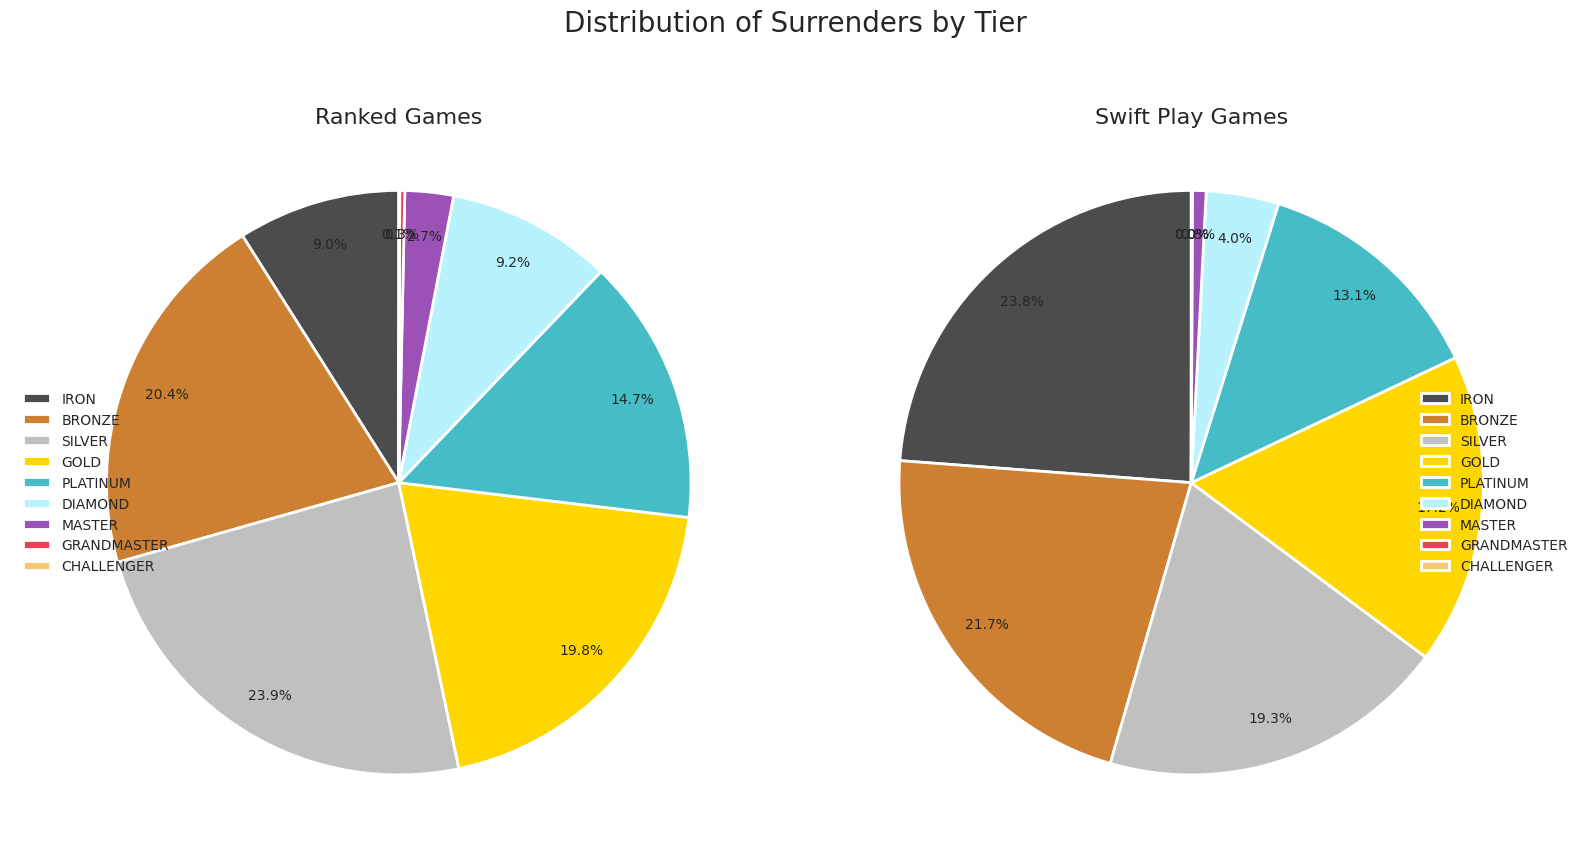

In [59]:
import seaborn as sns

# Set a clean, modern style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Count the number of surrenders by tier
ranked_tier_counts = ranked_surrendered['tier'].value_counts()
swift_tier_counts = swift_surrendered['tier'].value_counts()

# Sort the data by rank hierarchy for better visualization
tier_order = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'DIAMOND', 'MASTER', 'GRANDMASTER', 'CHALLENGER']
ranked_tier_counts = ranked_tier_counts.reindex(tier_order).dropna()
swift_tier_counts = swift_tier_counts.reindex(tier_order).dropna()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Distribution of Surrenders by Tier', fontsize=20, y=1.05)

# Color map that follows League rank colors
colors = {
    'IRON': '#4c4c4c',      # Dark gray
    'BRONZE': '#cd7f32',    # Bronze
    'SILVER': '#c0c0c0',    # Silver
    'GOLD': '#ffd700',      # Gold
    'PLATINUM': '#46bdc6',  # Teal
    'DIAMOND': '#b9f2ff',   # Light blue
    'MASTER': '#9c51b6',    # Purple
    'GRANDMASTER': '#e84057', # Red
    'CHALLENGER': '#f4c874'  # Light gold
}

# Extract colors in the correct order
ranked_colors = [colors[tier] for tier in ranked_tier_counts.index]
swift_colors = [colors[tier] for tier in swift_tier_counts.index]

# Plot the pie chart for Ranked surrenders
ax1.pie(
    ranked_tier_counts, 
    labels=None,  # No labels on the pie itself
    colors=ranked_colors,
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Add a clean legend for ranked
ax1.legend(
    ranked_tier_counts.index,
    loc="center left",
    bbox_to_anchor=(0, 0.5),
    frameon=False
)
ax1.set_title('Ranked Games', fontsize=16)

# Plot the pie chart for Swift Play surrenders
ax2.pie(
    swift_tier_counts, 
    labels=None,  # No labels on the pie itself
    colors=swift_colors,
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# Add a clean legend for swift play
ax2.legend(
    swift_tier_counts.index,
    loc="center right", 
    bbox_to_anchor=(1, 0.5),
    frameon=False
)
ax2.set_title('Swift Play Games', fontsize=16)

# Remove the axes
ax1.axis('equal')
ax2.axis('equal')

plt.tight_layout()
plt.show()

Overall Average Time Spent Dead in Ranked: 234.52 seconds


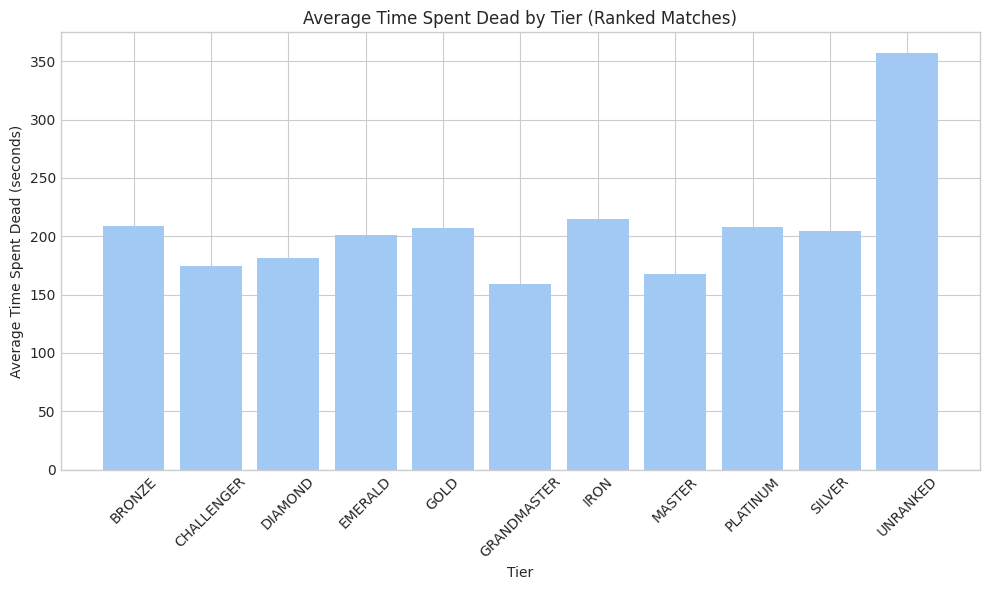

In [60]:
avg_dead_ranked = rank_player_match_data["totalTimeSpentDead"].astype(float).mean()
print(f"Overall Average Time Spent Dead in Ranked: {avg_dead_ranked:.2f} seconds")
# Convert to numeric in case it's read as string
rank_player_match_data["totalTimeSpentDead"] = rank_player_match_data["totalTimeSpentDead"].astype(float)
# Group by tier and calculate the mean
avg_dead_by_tier = rank_player_match_data.groupby("tier")["totalTimeSpentDead"].mean().reset_index()
# Optional: enforce tier order (if tier is categorical like Iron, Bronze, etc.)
# If it's numeric, we just sort
avg_dead_by_tier = avg_dead_by_tier.sort_values("tier")
plt.figure(figsize=(10, 6))
plt.bar(avg_dead_by_tier["tier"].astype(str), avg_dead_by_tier["totalTimeSpentDead"])
plt.xlabel("Tier")
plt.ylabel("Average Time Spent Dead (seconds)")
plt.title("Average Time Spent Dead by Tier (Ranked Matches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Overall Average Deaths per Player in Swiftplay: 160.12


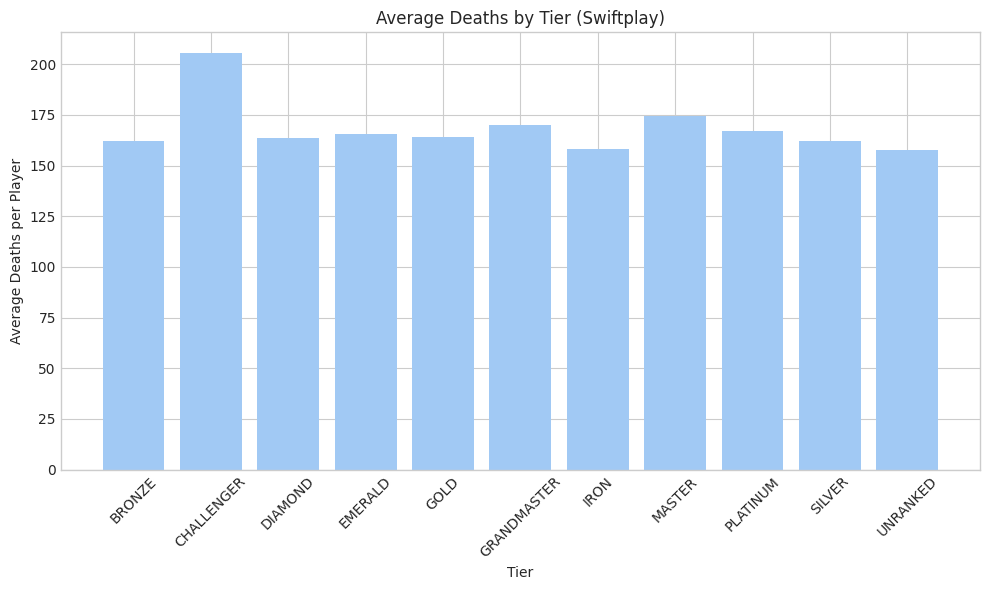

In [61]:
swift_player_match_data["totalTimeSpentDead"] = swift_player_match_data["totalTimeSpentDead"].astype(float)
avg_deaths_swift = swift_player_match_data["totalTimeSpentDead"].mean()
print(f"Overall Average Deaths per Player in Swiftplay: {avg_deaths_swift:.2f}")
avg_deaths_by_tier_swift = swift_player_match_data.groupby("tier")["totalTimeSpentDead"].mean().reset_index()
avg_deaths_by_tier_swift = avg_deaths_by_tier_swift.sort_values("tier")
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_deaths_by_tier_swift["tier"].astype(str), avg_deaths_by_tier_swift["totalTimeSpentDead"])
plt.xlabel("Tier")
plt.ylabel("Average Deaths per Player")
plt.title("Average Deaths by Tier (Swiftplay)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

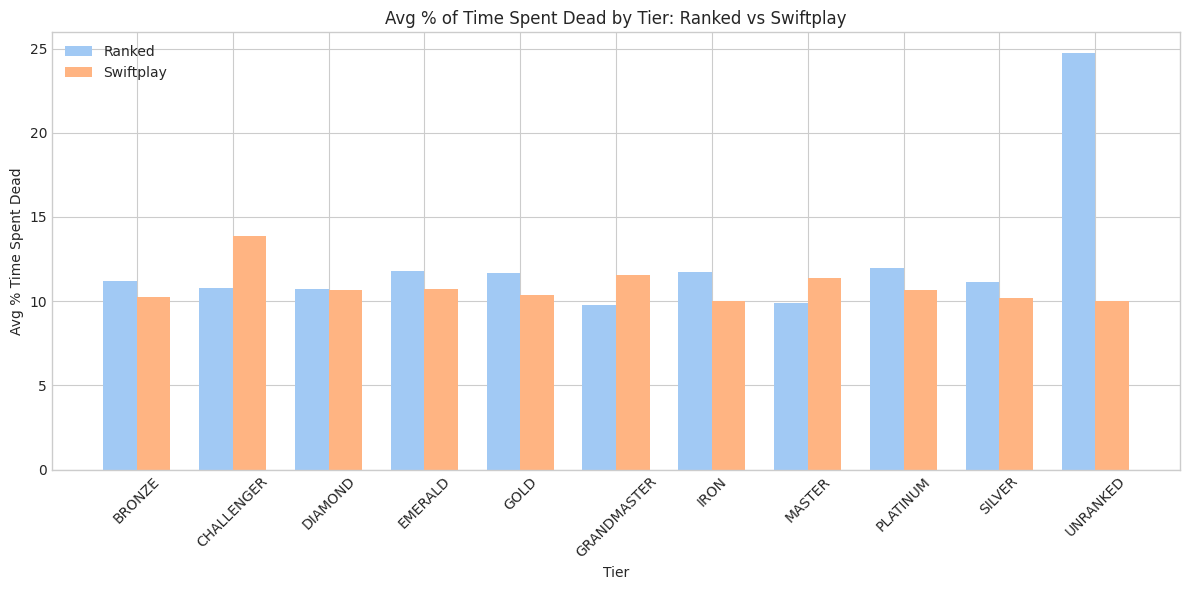

In [62]:
# Convert columns to numeric
rank_player_match_data["totalTimeSpentDead"] = rank_player_match_data["totalTimeSpentDead"].astype(float)
rank_player_match_data["timePlayed"] = rank_player_match_data["timePlayed"].astype(float)
ranked_valid = rank_player_match_data[rank_player_match_data["timePlayed"] > 0].copy()
# Compute dead-time ratio per player
ranked_valid["dead_time_ratio"] = ranked_valid["totalTimeSpentDead"] / ranked_valid["timePlayed"]
# Group by tier
ranked_ratio_by_tier = ranked_valid.groupby("tier")["dead_time_ratio"].mean().reset_index()
ranked_ratio_by_tier = ranked_ratio_by_tier.sort_values("tier")
swift_player_match_data["totalTimeSpentDead"] = swift_player_match_data["totalTimeSpentDead"].astype(float)
# Merge with match data to get timePlayed (from match duration)
swift_merged = pd.merge(swift_player_match_data, swift_match_data[["matchId", "gameDuration"]], on="matchId")
swift_merged["gameDuration"] = swift_merged["gameDuration"].astype(float)
swift_valid = swift_merged[swift_merged["gameDuration"] > 0].copy()
swift_valid["dead_time_ratio"] = swift_valid["totalTimeSpentDead"] / swift_valid["timePlayed"]
# Group by tier
swift_ratio_by_tier = swift_valid.groupby("tier")["dead_time_ratio"].mean().reset_index()
swift_ratio_by_tier = swift_ratio_by_tier.sort_values("tier")
ranked_ratio_by_tier.rename(columns={"dead_time_ratio": "Ranked"}, inplace=True)
swift_ratio_by_tier.rename(columns={"dead_time_ratio": "Swiftplay"}, inplace=True)
# Merge both
comparison_ratio = pd.merge(ranked_ratio_by_tier, swift_ratio_by_tier, on="tier")
x = np.arange(len(comparison_ratio))
width = 0.35
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, comparison_ratio["Ranked"] * 100, width, label="Ranked")
plt.bar(x + width/2, comparison_ratio["Swiftplay"] * 100, width, label="Swiftplay")
plt.xlabel("Tier")
plt.ylabel("Avg % Time Spent Dead")
plt.title("Avg % of Time Spent Dead by Tier: Ranked vs Swiftplay")
plt.xticks(x, comparison_ratio["tier"].astype(str), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
print(rank_player_match_data.columns)
print(player_data.columns)
print(rank_match_data.columns)
print(swift_match_data.columns)
print(swift_player_match_data.columns)

Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints', 'full_rank'],
      dtype='object')
Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio',
       'full_rank'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='obj